# Introduction to data analysis: `Pandas` and vizualisation

-- [SICSS Zürich 2021](https://github.com/computational-social-science-zurich/sicss-zurich) -- 
 ## Preambule

This notebooks walks you through some basic programming excercises in python to get you acquainted with using python and jupyter notebooks.

 <span style='color:green'> Questions to answer are in green</span>

### Core python basic knowledge
 => See the `R-stata-cookbook-for-python` notebook

### Loading Packages

One of the things that makes python such a powerful programming+statistical tool are the freely available and high quality packages which are constantly being written by users almost daily. For our purposes we will be loading two packages: 

* `pandas` package for data management;
* `matplotlib` for plotting, and `seaborn` for nicer plots

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
pd.set_option('display.max_columns', 500)

### Background

We will be using the [Stop, Question and Frisk Data from the NYPD](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page) which contains information about over 100,000 police citizen interactions between 2003-2016 (but we use it for 2016 only).

Throughout the notebook, we study how individual level characteristics correlates with being arrested, aim at describing whether arrests are showing evidence of racism. 

We will explore the connection between the following variables:

* **arstmade** - Was an arrest made?
* **race** - Race of the suspect.
* **timestop** - Time that the suspect was stopped. 
* **datestop** - Date that the suspect was stopped. 
* **age** - Suspect's age.


## Importing and cleaning data

In [3]:
# Importation from a URL, but works with a filepath instead
df=pd.read_csv("https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/stop-question-frisk/sqf-2016.csv")

/home/guillotm/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,8,18,19,73,74,84,85,86,103,110,111) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Looking at the data

In [80]:
df.columns

Index(['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout',
       'trhsloc', 'perobs', 'crimsusp',
       ...
       'sector', 'beat', 'post', 'xcoord', 'ycoord', 'dettypCM', 'lineCM',
       'detailCM', 'arst_dummy', 'percent'],
      dtype='object', length=114)

In [5]:
df.shape

(12405, 112)

This tells us that we have 12,405 observations (stops) and have 112 variables which were collected for the stops.

In [81]:
# have a look at the first rows
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,forceuse,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM,arst_dummy,percent
0,2016,41,22,2072016,100,A,O,P,1,BURG,8,P,Y,N,N,,Y,TRESPAS,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,Y,N,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,41,40,Y,N,V,S,SF,M,B,,48.0,6,2,180,BK,BR,T,,,,,STREET,,,BARRY STREET,OAK POINT AVENUE,,BRONX,,,41,B,2,,1013353,234000,CM,1,14,0,NaN
1,2016,10,22,2182016,30,1,O,P,8,MISDEMEANOR,10,P,Y,Y,N,,N,,0,0,N,,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,Y,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,Y,10,10,N,N,,S,,M,W,,20.0,5,8,150,BR,BR,T,,,,,CAR ON PUBLIC STREET,,,WEST 26 STREET,10 AVENUE,,MANHATTAN,,,10,D,,,983478,212373,CM,1,28,0,NaN
2,2016,66,1,1012016,30,1,I,P,2,FEL,10,P,Y,N,Y,ASSAULT,N,,0,0,Y,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,66,66,N,N,,,,M,P,,34.0,5,6,140,BK,BR,M,,,,,,1382,40 STREET,14 AVENUE,13 AVENUE,,BROOKLYN,,,66,F,,,988340,172111,CM,1,9,1,0.01
3,2016,47,18,1012016,40,1,O,H,1,FEL,2,V,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,Y,N,N,N,N,N,Y,N,Y,N,N,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,808,808,Y,N,,,SW,M,B,,33.0,5,9,180,BK,BR,M,,,,,,1890,SCHIEFELIN PLACE,EAST 229 STREET,EAST 225 STREET,,BRONX,,,47,C,,,,,CM,1,20,0,NaN
4,2016,79,1,1012016,50,1,O,P,3,D.W.I.,10,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,79,79,N,N,,,,M,B,,22.0,5,11,160,BK,BL,T,,,,,COMMERICAL,,,MACON STREET,NOSTRAND AVENUE,,BROOKLYN,,,79,G,4,,998197,187413,CM,1,112,0,NaN


## Summary statistics

Show some summary statistics :

### <span style='color:green'> Share of people arrested $=>$ clean this variable</span>

In [11]:
# Share of people arrested
print(df['arstmade'].value_counts(normalize=True))

N    0.786860
Y    0.213059
     0.000081
Name: arstmade, dtype: float64


There seeems to be a missing variable : remove the observation 

In [12]:
# clean arstmade
df=df[df['arstmade']!=" "]
df.shape

(12404, 112)

### <span style='color:green'>Distribution of race</span>

In [60]:
# B: black, A: Asian, W: White, P: Black Hispanic, Q: White Hispanic
df['race'].value_counts(normalize=True)

B    0.523863
Q    0.221945
W    0.102386
P    0.070381
A    0.059416
Z    0.011287
U    0.007659
I    0.003064
Name: race, dtype: float64

### <span style='color:green'>Number and % of people arrested and % of people not arrested within each racial category.</span>

In other words, of the people that are arrested, what percent are Black, White, Hispanic etc. Of the people that are not arrested, what percent are Black, White, Hispanic etc..

Use the `groupby` syntax from `pandas`.

In [55]:
df_grouped= df.groupby(['race', 'arstmade']).agg({'arstmade': 'count'})
df_grouped['percent'] = df_grouped.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
df_grouped

arstmade  percent
race arstmade                   
A    N              619     0.84
     Y              118     0.16
B    N             5194     0.80
     Y             1304     0.20
I    N               32     0.84
     Y                6     0.16
P    N              674     0.77
     Y              199     0.23
Q    N             2044     0.74
     Y              709     0.26
U    N               71     0.75
     Y               24     0.25
W    N             1008     0.79
     Y              262     0.21
Z    N              119     0.85
     Y               21     0.15

**Percentage of people from different racial category, for the frisked group and non-frisked group, respectively**

## Visualization

### <span style='color:green'>Plot the distribution of race among stopped individual</span>

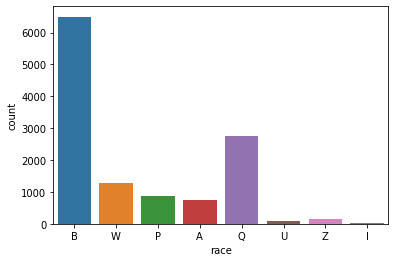

In [73]:
sn.countplot(x="race", data=df)

### Create a plot of arrests made vs. race 

#### <span style='color:green'>Create a variable `arst_dummy` equal to 1 if the stop led to an arrest and 0 if not.</span>

You can use the `apply` syntax from Pandas. 

In [20]:
df['arst_dummy'] = df['arstmade'].apply(lambda x: 1 if x=="Y" else 0)

#### <span style='color:green'>Represent the previous summary statistics for the percent of people within each racial group that were arrested  with a bar plot instead.</span>

The bar plot should have the title "Percent of Racial Group Arrested".
Now you can plot arrests made vs. race using the previous dummy. 
You can use the `barplot` function from `seaborn`.

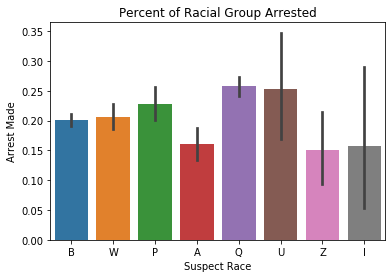

In [56]:
ax=sn.barplot(x="race",y="arst_dummy",data=df)
ax.set(xlabel='Suspect Race', ylabel='Arrest Made')
plt.title("Percent of Racial Group Arrested")
plt.show()

### What is the distrbution of ages by those who are arrested vs. not?

#### <span style='color:green'>Cleaning step: convert `age` to a numeric</span>

In [58]:
df['age']=pd.to_numeric(df['age'], errors='coerce')

#### <span style='color:green'>Plot the age distribution by those who are arrested vs. not</span>

You can use `displot` from seaborn or `hist` from matplotlib 

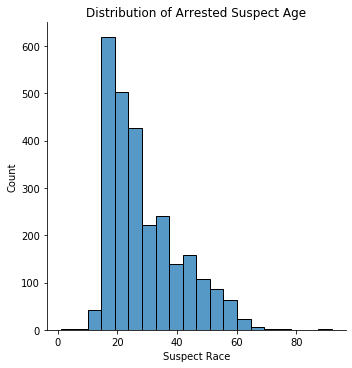

In [46]:
ax=sn.displot(df[df['arstmade']=="Y"], x="age", bins=20)
ax.set(xlabel='Suspect Race', title='Distribution of Arrested Suspect Age')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Non−Arrested Suspect Age')

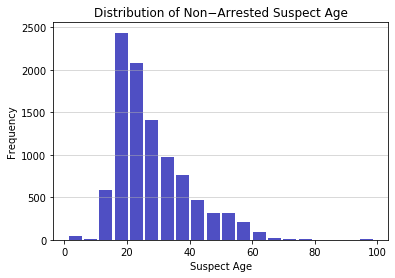

In [59]:
# Using another syntax:
n, bins, patches = plt.hist(x=df.loc[df['arstmade']=="N",'age'], bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.6)
plt.xlabel('Suspect Age')
plt.ylabel('Frequency')
plt.title('Distribution of Non−Arrested Suspect Age')

### Writing function & using loops

Many of the variables in the stop and frisk data are coded as "Y" for "Yes" and "N" for no. 

#### <span style='color:green'>Propose an easy means of recoding every variable in the stop and frisk data set using a function that you define. </span>

In order to save some time from having to recode every single variable that contains a "Y" or a "N", write a function that transforms:

* "Y" codings to 1
* "N" codings to 0
* " " codings to np.NAN (missing)

You should be able to use this function in an `apply` framework.

In [155]:
### YOUR CODE HERE
def yesno(oldvariable):
  # YOUR CODE HERE   
    if (oldvariable=="Y"): newvariable = 1
    if (oldvariable=="N"): newvariable = 0
    else:
        newvariable=np.NAN
    return newvariable

In [152]:
df['arstmade'].apply(lambda x: yesno(x)) 

0        0.0
1        0.0
2        NaN
3        0.0
4        0.0
        ... 
12399    0.0
12400    0.0
12401    0.0
12402    NaN
12403    0.0
Name: arstmade, Length: 12404, dtype: float64

#### <span style='color:green'>`for` loop </span>

Using the `yesno` function, write a loop that transforms every single variable in the "stopandfrisk2016" data frame containing a "Y" or "N" coding into "1", "0" or "NA" codings as specified above. 

Save these newly coded variables in a data frame called `recoded` and use the `head()` function to print out the first few observations of the new dataframe that you created.

In [157]:
list_yes_no_var=['arstmade', 'explnstp', 'othpers']
for var in list_yes_no_var:
    df['is_{}'.format(var)]=df[var].apply(lambda x: yesno(x)) 

## Going further: arrest rate depending on hour of the day

In [75]:
# Calculate the overall arrest rate
print(df['arst_dummy'].mean())

0.21307642695904547


In [126]:
df['hour']=df['timestop'].apply(lambda x: str(x)[0:len(str(x))-2])
df['hour']=df['hour'].apply(lambda x: '0' if (x=='') else x)
df['hour']=pd.to_numeric(df['hour'])

In [128]:
# Calculate the hourly arrest rate
print(df.groupby(df.hour).arst_dummy.mean())

hour
0     0.225573
1     0.184275
2     0.208711
3     0.198312
4     0.196721
5     0.138365
6     0.201754
7     0.252874
8     0.251497
9     0.214286
10    0.247350
11    0.192399
12    0.220455
13    0.196464
14    0.187614
15    0.215645
16    0.257053
17    0.221889
18    0.231767
19    0.224845
20    0.231065
21    0.227376
22    0.188264
23    0.195734
Name: arst_dummy, dtype: float64


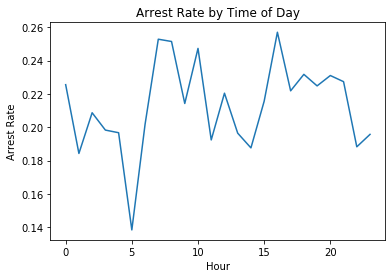

In [129]:
# Save the hourly arrest rate
hourly_arrest_rate = df.groupby(df['hour']).arst_dummy.mean()

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()